In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data generation

In [309]:
x_dim = 2 # dimension of observations
freq = 0.1 # frequency of class 2 samples
mu_1 = np.random.randn(x_dim,1) # mean of class 1
mu_2 = np.random.randn(x_dim,1) # mean of class 2
sig = np.random.randn(x_dim,x_dim)/np.sqrt(x_dim)
Sigma = sig@sig.T
samples = 100000 # number of data points

In [310]:
class_1 = mu_1 + sig@np.random.randn(x_dim,int(samples*(1-freq)))
class_2 = mu_2 + sig@np.random.randn(x_dim,int(samples*freq))

In [314]:
X = np.concatenate((class_1,class_2),axis=1)
Y = np.zeros((2,samples)); Y[0,:int(samples*(1-freq))] = 1; Y[1,-int(samples*freq):] = 1
idx = np.random.permutation(samples)
X = X[:,idx]
Y = Y[:,idx]

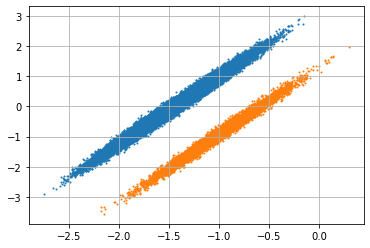

In [315]:
plt.scatter(class_1[0],class_1[1],s=1)
plt.scatter(class_2[0],class_2[1],s=1)
plt.grid()
plt.show()

### Optimal solution

In [350]:
w_opt = np.linalg.inv(Sigma)@(mu_1-mu_2)
w_opt = w_opt/np.sqrt(w_opt.T@Sigma@w_opt)

In [351]:
obj_opt = (w_opt.T@(mu_1-mu_2))**2

### Offline algorithm

In [416]:
eta = 0.01; gam = 1*eta; iters = 100000

In [417]:
w = np.random.randn(x_dim,1)/np.sqrt(x_dim)
l = 1

In [418]:
obj = np.zeros(iters)
err = np.zeros(iters)

for i_iter in range(iters):
    w = w + eta*(mu_1 - mu_2 - l*Sigma@w)
    l = l + gam*(w.T@Sigma@w - 1)
    obj[i_iter] = (w.T@(mu_1-mu_2))**2
    err[i_iter] = np.abs(obj_opt - obj[i_iter])/obj_opt

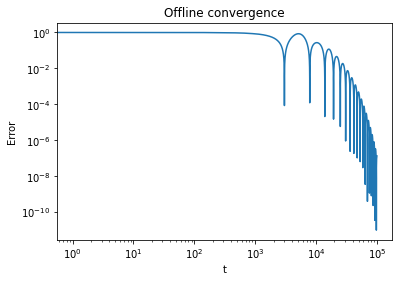

In [419]:
plt.loglog(range(iters), err)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Offline convergence")
plt.show()

### Online algorithm

In [514]:
eta = 0.01; gam = 10*eta; epochs = 10; iters = epochs*samples

In [515]:
w = np.random.randn(x_dim)/np.sqrt(x_dim)
l = 1

In [526]:
obj = np.zeros(iters)
err = np.zeros(iters)

mu_1_t = np.zeros(x_dim)
mu_2_t = np.zeros(x_dim)

for i_epoch in range(epochs):
        
    idx = np.random.permutation(samples)
    
    for i_sample in range(samples):

        i_iter = i_epoch*samples + i_sample
        
        x = X[:,idx[i_sample]]
        y = Y[:,idx[i_sample]]
        
        if y[0]==1:
            mu_1_t += (x - mu_1_t)/100
        elif y[1]==1:
            mu_2_t += (x - mu_2_t)/100
            
        mu = mu_1_t*y[0] + mu_2_t*y[1]
        w = w + eta*(x*y[0] - x*y[1] - l*(x-mu)*(w.T@(x-mu)))
        l = l + gam*((w.T@(x-mu))**2 - 1)
        obj[i_iter] = (w.T@(mu_1-mu_2))**2
        err[i_iter] = np.abs(obj_opt - obj[i_iter])/obj_opt

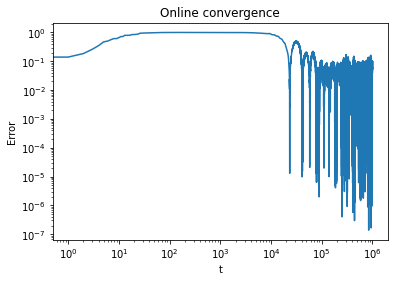

In [527]:
plt.loglog(range(iters), err)
plt.ylabel("Error")
plt.xlabel("t")
plt.title("Online convergence")
plt.show()